In [20]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [21]:
treeBiomass = pd.read_excel('Chapter16_17.xlsx', sheet_name=3) 
treeBiomass

,Diameter at Breast Height (cm),Biomass (Kg),Source
0,3.7,5.0,1
1,8.5,14.8,1
2,20.3,166.5,1
3,24.0,241.0,1
4,31.0,417.0,1
5,41.0,510.9,1
6,23.2,343.1,2
7,23.5,446.7,2
8,23.8,243.3,2
9,24.2,367.5,2


slope: 18.628403087441374
intercept: -180.51541353791012


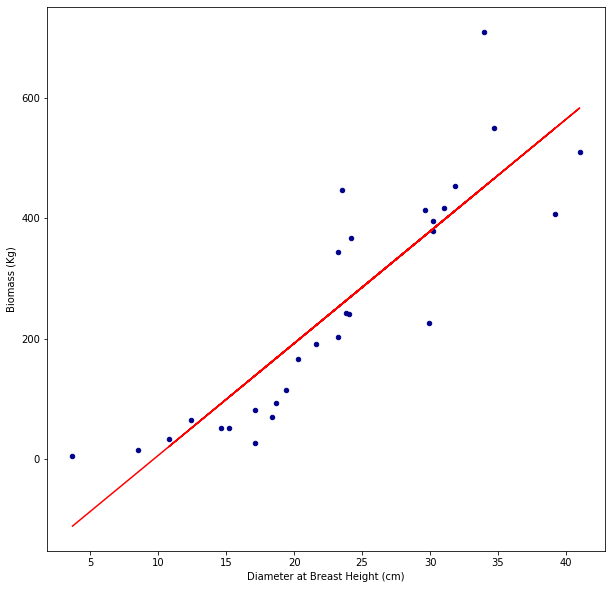

In [22]:
ax1 = treeBiomass.plot.scatter(x="Diameter at Breast Height (cm)",y="Biomass (Kg)",c='DarkBlue', figsize=(10,10))  
x = treeBiomass["Diameter at Breast Height (cm)"]
y = treeBiomass["Biomass (Kg)"]

regressStats = stats.linregress(x, y)
slope = regressStats.slope
intercept = regressStats.intercept
print("slope:", slope)
print("intercept:", intercept)
plt.plot(x, slope * x + intercept, color="red")

In [23]:
rsq = regressStats.rvalue**2
print("R-squared: %f" % rsq)

R-squared: 0.769262


In [24]:
treeBiomass["modeled_Biomass"] = treeBiomass["Diameter at Breast Height (cm)"] * slope + intercept
treeBiomass['residual'] = (treeBiomass["modeled_Biomass"] - treeBiomass["Biomass (Kg)"])**2
treeBiomass

,Diameter at Breast Height (cm),Biomass (Kg),Source,modeled_Biomass,residual
0,3.7,5.0,1,-111.590322,13593.303211
1,8.5,14.8,1,-22.173987,1367.075736
2,20.3,166.5,1,197.641169,969.772415
3,24.0,241.0,1,266.566261,653.633679
4,31.0,417.0,1,396.965082,401.397932
5,41.0,510.9,1,583.249113,5234.394159
6,23.2,343.1,2,251.663538,8360.626566
7,23.5,446.7,2,257.252059,35890.522343
8,23.8,243.3,2,262.840580,381.834265
9,24.2,367.5,2,270.291941,9449.406700


In [25]:
SE = (treeBiomass['residual'].sum()/ (treeBiomass['residual'].count() - 2))**0.5
print("standard error", SE)

standard error 93.96228145545639


In [26]:
Fstat = rsq * (treeBiomass['residual'].count() - 2) / (1 - rsq)
"test statistic", Fstat

('test statistic', 90.0160416909699)

In [27]:
pvalueSLR = 1 - stats.f.cdf(Fstat, 1, treeBiomass['residual'].count() - 2)
"pvalue", pvalueSLR

('pvalue', 4.3342029965032225e-10)